In [1]:
from math import pi

import numpy as np
import retworkx as rx
from qiskit_nature.problems.second_quantization.lattice import (
    BoundaryCondition,
    IsingModel,
    FermiHubbardModel,
    HyperCubicLattice,
    Lattice,
    LatticeDrawStyle,
    LineLattice,
    SquareLattice,
    TriangularLattice,
)

Numpy 1.16 has memory leak bug  https://github.com/numpy/numpy/issues/13808
It is recommended to downgrade to numpy 1.15 or older


In [2]:
num_nodes = 11
boundary_condition = BoundaryCondition.OPEN
line_lattice = LineLattice(num_nodes=num_nodes, boundary_condition=boundary_condition)

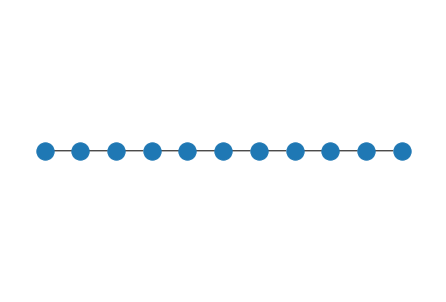

In [3]:
line_lattice.draw()

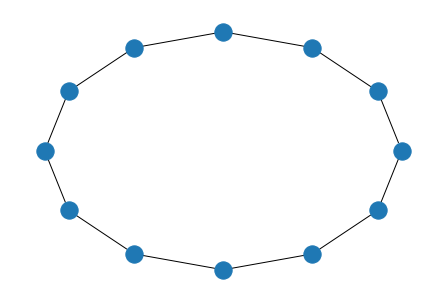

In [7]:
#boundary conditions determine the shape in one dimension
num_nodes = 11
boundary_condition = BoundaryCondition.PERIODIC
line_lattice = LineLattice(12, boundary_condition=BoundaryCondition.PERIODIC)

line_lattice.draw()

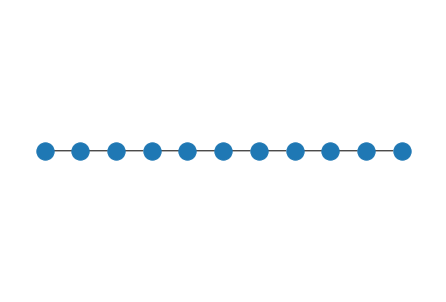

In [16]:
#ignore boundary conditions
line_lattice.draw_without_boundary()

In [17]:
num_nodes = 11
boundary_condition = BoundaryCondition.PERIODIC
edge_parameter = 1.0 + 1.0j
onsite_parameter = 1.0
line_lattice = LineLattice(
    num_nodes=num_nodes,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition,
)
set(line_lattice.graph.weighted_edge_list())

{(0, 0, 1.0),
 (0, 1, (1+1j)),
 (0, 10, (1-1j)),
 (1, 1, 1.0),
 (1, 2, (1+1j)),
 (2, 2, 1.0),
 (2, 3, (1+1j)),
 (3, 3, 1.0),
 (3, 4, (1+1j)),
 (4, 4, 1.0),
 (4, 5, (1+1j)),
 (5, 5, 1.0),
 (5, 6, (1+1j)),
 (6, 6, 1.0),
 (6, 7, (1+1j)),
 (7, 7, 1.0),
 (7, 8, (1+1j)),
 (8, 8, 1.0),
 (8, 9, (1+1j)),
 (9, 9, 1.0),
 (9, 10, (1+1j)),
 (10, 10, 1.0)}

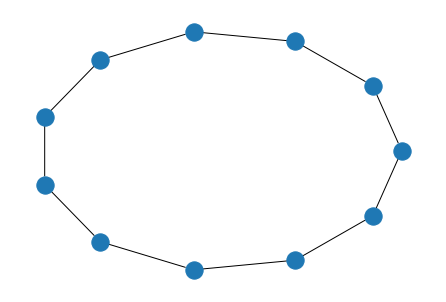

In [18]:
line_lattice.draw()

In [19]:
line_lattice.to_adjacency_matrix()

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [20]:
#hermitian
line_lattice.to_adjacency_matrix(weighted=True)

array([[1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 1.-1.j],
       [1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j, 0.+0.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j, 1.+1.j,
        0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j, 1.+0.j,
        1.+1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.-1.j,
        1.+0.j, 1.+1.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,

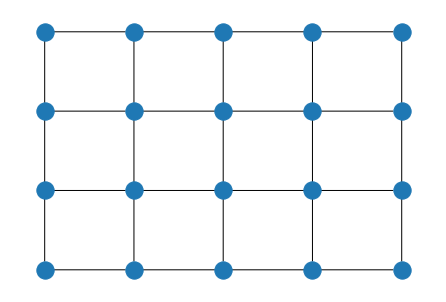

In [23]:
rows = 5
cols = 4
boundary_condition = BoundaryCondition.OPEN
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

square_lattice.draw()

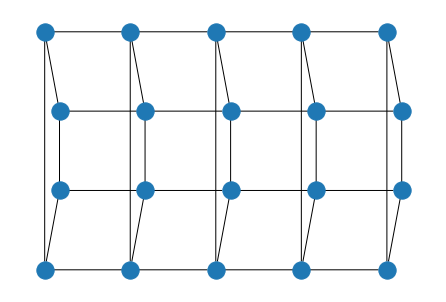

In [26]:
# We can specify the boundary conditions for each direction by setting boundary_condition as a tuple.
rows = 5
cols = 4
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.PERIODIC,
)  # open in the x-direction, periodic in the y-direction
square_lattice = SquareLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

square_lattice.draw()

In [28]:
rows = 5
cols = 4
edge_parameter = (1.0, 1.0 + 1.0j)
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.PERIODIC,
)  # open in the x-direction, periodic in the y-direction
onsite_parameter = 1.0
square_lattice = SquareLattice(
    rows=rows,
    cols=cols,
    edge_parameter=edge_parameter,
    onsite_parameter=onsite_parameter,
    boundary_condition=boundary_condition,
)

set(square_lattice.graph.weighted_edge_list())

{(0, 0, 1.0),
 (0, 1, 1.0),
 (0, 5, (1+1j)),
 (0, 15, (1-1j)),
 (1, 1, 1.0),
 (1, 2, 1.0),
 (1, 6, (1+1j)),
 (1, 16, (1-1j)),
 (2, 2, 1.0),
 (2, 3, 1.0),
 (2, 7, (1+1j)),
 (2, 17, (1-1j)),
 (3, 3, 1.0),
 (3, 4, 1.0),
 (3, 8, (1+1j)),
 (3, 18, (1-1j)),
 (4, 4, 1.0),
 (4, 9, (1+1j)),
 (4, 19, (1-1j)),
 (5, 5, 1.0),
 (5, 6, 1.0),
 (5, 10, (1+1j)),
 (6, 6, 1.0),
 (6, 7, 1.0),
 (6, 11, (1+1j)),
 (7, 7, 1.0),
 (7, 8, 1.0),
 (7, 12, (1+1j)),
 (8, 8, 1.0),
 (8, 9, 1.0),
 (8, 13, (1+1j)),
 (9, 9, 1.0),
 (9, 14, (1+1j)),
 (10, 10, 1.0),
 (10, 11, 1.0),
 (10, 15, (1+1j)),
 (11, 11, 1.0),
 (11, 12, 1.0),
 (11, 16, (1+1j)),
 (12, 12, 1.0),
 (12, 13, 1.0),
 (12, 17, (1+1j)),
 (13, 13, 1.0),
 (13, 14, 1.0),
 (13, 18, (1+1j)),
 (14, 14, 1.0),
 (14, 19, (1+1j)),
 (15, 15, 1.0),
 (15, 16, 1.0),
 (16, 16, 1.0),
 (16, 17, 1.0),
 (17, 17, 1.0),
 (17, 18, 1.0),
 (18, 18, 1.0),
 (18, 19, 1.0),
 (19, 19, 1.0)}

In [33]:
size = (3, 4, 5)
boundary_condition = (
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
    BoundaryCondition.OPEN,
)
cubic_lattice = HyperCubicLattice(size=size, boundary_condition=boundary_condition)

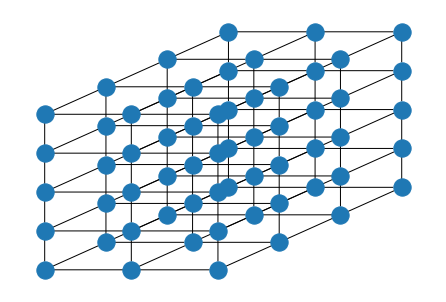

In [49]:
# function for setting the positions
def indextocoord_3d(index: int, size: tuple, angle) -> list:
    z = index // (size[0] * size[1])
    a = index % (size[0] * size[1])
    y = a // size[0]
    x = a % size[0]
    vec_x = np.array([1, 0])
    vec_y = np.array([np.cos(angle), np.sin(angle)])
    vec_z = np.array([0, 1])
    return_coord = x * vec_x + y * vec_y + z * vec_z
    return return_coord.tolist()


pos = dict([(index, indextocoord_3d(index, size, angle=pi / 4)) for index in range(np.prod(size))])

cubic_lattice.draw(style=LatticeDrawStyle(pos=pos))

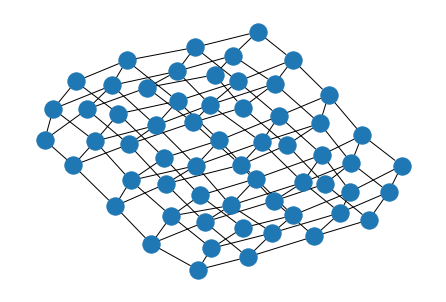

In [45]:
#specify parameters to draw clean lattice
cubic_lattice.draw()

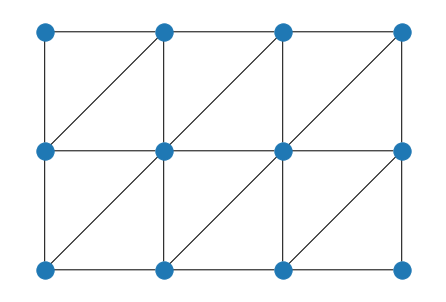

In [50]:
rows = 4
cols = 3
boundary_condition = BoundaryCondition.OPEN

triangular_lattice = TriangularLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

triangular_lattice.draw()

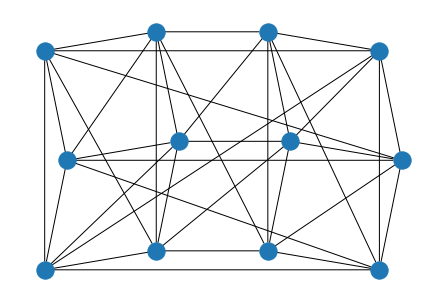

In [52]:
rows = 4
cols = 3
boundary_condition = BoundaryCondition.PERIODIC

triangular_lattice = TriangularLattice(rows=rows, cols=cols, boundary_condition=boundary_condition)

triangular_lattice.draw()

In [53]:
graph = rx.PyGraph(multigraph=False)  # multiigraph shoud be False
graph.add_nodes_from(range(6))

#edge: (start, end, weight)
weighted_edge_list = [
    (0, 1, 1.0 + 1.0j),
    (0, 2, -1.0),
    (2, 3, 2.0),
    (4, 2, -1.0 + 2.0j),
    (4, 4, 3.0),
    (2, 5, -1.0),
]
graph.add_edges_from(weighted_edge_list)

# make a lattice
general_lattice = Lattice(graph)
set(general_lattice.graph.weighted_edge_list())

{(0, 1, (1+1j)),
 (0, 2, -1.0),
 (2, 3, 2.0),
 (2, 5, -1.0),
 (4, 2, (-1+2j)),
 (4, 4, 3.0)}

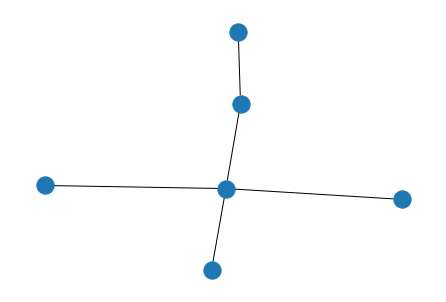

In [55]:
general_lattice.draw()

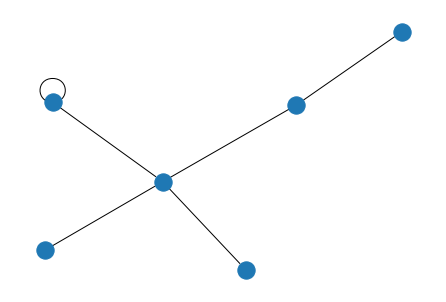

In [56]:
general_lattice.draw(self_loop=True)

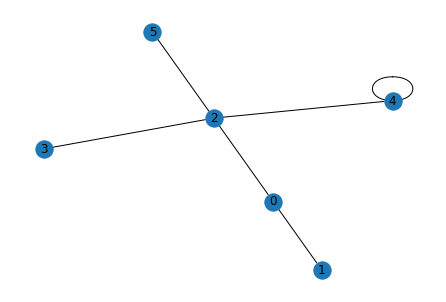

In [57]:
general_lattice.draw(self_loop=True, style=LatticeDrawStyle(with_labels=True))

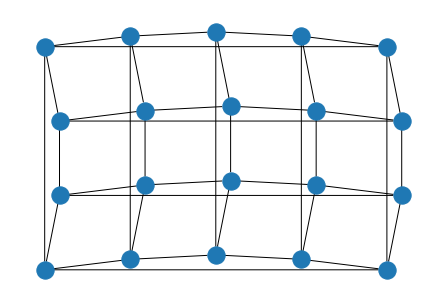

In [58]:
square_lattice = SquareLattice(rows=5, cols=4, boundary_condition=BoundaryCondition.PERIODIC)

t = -1.0  # the interaction parameter
v = 0.0  # the onsite potential
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel.uniform_parameters(
    lattice=square_lattice,
    uniform_interaction=t, #interaction strength -- "hopping term"
    uniform_onsite_potential=v,
    onsite_interaction=u,
)

square_lattice.draw()

In [68]:
ham = fhm.second_q_ops(display_format="sparse").reduce()
print(ham)

Fermionic Operator
register length=12, number terms=28
  (1+1j) * ( +_0 -_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (-1+1j) * ( -_0 +_2 )
+ (1+0j) * ( -_0 +_4 )
+ (1+1j) * ( +_1 -_3 )
+ (-1+0j) * ( +_1 -_5 )
+ (-1+1j) * ( -_1 +_3 )
+ (1+0j) * ( -_1 +_5 )
+ (2+0j) * ( +_4 -_6 )
+ (-1-2j) * ( +_4 -_8 )
+ (-1+0j) * ( +_4 -_10 )
+ (-2+0j) * ( -_4 +_6 )
+ (1-2j) * ( -_4 +_8 )
+ (1+0j) * ( -_4 +_10 )
+ (2+0j) * ( +_5 -_7 )
+ (-1-2j) * ( +_5 -_9 )
+ (-1+0j) * ( +_5 -_11 )
+ (-2+0j) * ( -_5 +_7 )
+ (1-2j) * ( -_5 +_9 )
+ (1+0j) * ( -_5 +_11 )
+ (5+0j) * ( +_10 -_10 +_11 -_11 )
+ (3+0j) * ( +_9 -_9 )
+ (3+0j) * ( +_8 -_8 )
+ (5+0j) * ( +_8 -_8 +_9 -_9 )
+ (5+0j) * ( +_6 -_6 +_7 -_7 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )


In [60]:
graph = rx.PyGraph(multigraph=False)  # multiigraph shoud be False
graph.add_nodes_from(range(6))
weighted_edge_list = [
    (0, 1, 1.0 + 1.0j),
    (0, 2, -1.0),
    (2, 3, 2.0),
    (4, 2, -1.0 + 2.0j),
    (4, 4, 3.0),
    (2, 5, -1.0),
]
graph.add_edges_from(weighted_edge_list)

general_lattice = Lattice(graph)  # the lattice whose weights are seen as the interaction matrix.
u = 5.0  # the interaction parameter U

fhm = FermiHubbardModel(lattice=general_lattice, onsite_interaction=u)

ham = fhm.second_q_ops(display_format="sparse").reduce()
ham.set_truncation(0)
print(ham)

Fermionic Operator
register length=12, number terms=28
  (1+1j) * ( +_0 -_2 )
+ (-1+0j) * ( +_0 -_4 )
+ (-1+1j) * ( -_0 +_2 )
+ (1+0j) * ( -_0 +_4 )
+ (1+1j) * ( +_1 -_3 )
+ (-1+0j) * ( +_1 -_5 )
+ (-1+1j) * ( -_1 +_3 )
+ (1+0j) * ( -_1 +_5 )
+ (2+0j) * ( +_4 -_6 )
+ (-1-2j) * ( +_4 -_8 )
+ (-1+0j) * ( +_4 -_10 )
+ (-2+0j) * ( -_4 +_6 )
+ (1-2j) * ( -_4 +_8 )
+ (1+0j) * ( -_4 +_10 )
+ (2+0j) * ( +_5 -_7 )
+ (-1-2j) * ( +_5 -_9 )
+ (-1+0j) * ( +_5 -_11 )
+ (-2+0j) * ( -_5 +_7 )
+ (1-2j) * ( -_5 +_9 )
+ (1+0j) * ( -_5 +_11 )
+ (5+0j) * ( +_10 -_10 +_11 -_11 )
+ (3+0j) * ( +_9 -_9 )
+ (3+0j) * ( +_8 -_8 )
+ (5+0j) * ( +_8 -_8 +_9 -_9 )
+ (5+0j) * ( +_6 -_6 +_7 -_7 )
+ (5+0j) * ( +_4 -_4 +_5 -_5 )
+ (5+0j) * ( +_2 -_2 +_3 -_3 )
+ (5+0j) * ( +_0 -_0 +_1 -_1 )


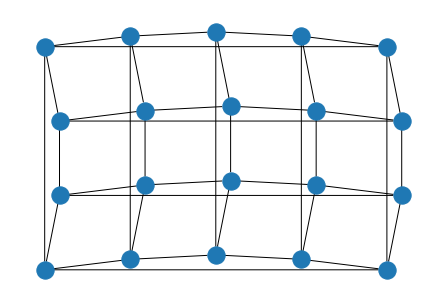

In [76]:
square_lattice = SquareLattice(rows=5, cols=4, boundary_condition=BoundaryCondition.PERIODIC)

t = -1.0  # the interaction parameter
v = 0.0  # the onsite potential

ising = IsingModel.uniform_parameters(
    lattice=square_lattice,
    uniform_interaction=t, #interaction strength -- "hopping term"
    uniform_onsite_potential=v
)

square_lattice.draw()

In [87]:
print(type(ising.second_q_ops().reduce()))
ham = ising.second_q_ops()
print(ham)

<class 'qiskit_nature.operators.second_quantization.spin_op.SpinOp'>
  Z_0 Z_1 * (-1+0j)
+ Z_0 Z_5 * (-1+0j)
+ Z_5 Z_6 * (-1+0j)
+ Z_5 Z_10 * (-1+0j)
+ Z_10 Z_11 * (-1+0j)
+ Z_10 Z_15 * (-1+0j)
+ Z_15 Z_16 * (-1+0j)
+ Z_1 Z_2 * (-1+0j)
+ Z_1 Z_6 * (-1+0j)
+ Z_6 Z_7 * (-1+0j)
+ Z_6 Z_11 * (-1+0j)
+ Z_11 Z_12 * (-1+0j)
+ Z_11 Z_16 * (-1+0j)
+ Z_16 Z_17 * (-1+0j)
+ Z_2 Z_3 * (-1+0j)
+ Z_2 Z_7 * (-1+0j)
+ Z_7 Z_8 * (-1+0j)
+ Z_7 Z_12 * (-1+0j)
+ Z_12 Z_13 * (-1+0j)
+ Z_12 Z_17 * (-1+0j)
+ Z_17 Z_18 * (-1+0j)
+ Z_3 Z_4 * (-1+0j)
+ Z_3 Z_8 * (-1+0j)
+ Z_8 Z_9 * (-1+0j)
+ Z_8 Z_13 * (-1+0j)
+ Z_13 Z_14 * (-1+0j)
+ Z_13 Z_18 * (-1+0j)
+ Z_18 Z_19 * (-1+0j)
+ Z_4 Z_9 * (-1+0j)
+ Z_9 Z_14 * (-1+0j)
+ Z_14 Z_19 * (-1+0j)
+ X_0 * 0j
+ X_1 * 0j
+ X_2 * 0j
+ X_3 * 0j
+ X_4 * 0j
+ X_5 * 0j
+ X_6 * 0j
+ X_7 * 0j
+ X_8 * 0j
+ X_9 * 0j
+ X_10 * 0j
+ X_11 * 0j
+ X_12 * 0j
+ X_13 * 0j
+ X_14 * 0j
+ X_15 * 0j
+ X_16 * 0j
+ X_17 * 0j
+ X_18 * 0j
+ X_19 * 0j
+ Z_0 Z_4 * (-1+0j)
+ Z_5 Z_9 * (-1+0j)
+ Z_10 Z_1